In [1]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 

import plotly.express as px 
import numpy as np 


mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

import statsmodels.api as sm 
from statsmodels.tsa.api import VAR

In [3]:
df = pd.read_csv('appliance_energy_usage.csv', parse_dates=True, index_col=0)

In [4]:
df

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,60,30,6.600000,733.5,92.000000,7.000000,5.300000,63.000000
2016-01-11 17:10:00,60,30,6.483333,733.6,92.000000,6.666667,5.200000,59.166667
2016-01-11 17:20:00,50,30,6.366667,733.7,92.000000,6.333333,5.100000,55.333333
2016-01-11 17:30:00,50,40,6.250000,733.8,92.000000,6.000000,5.000000,51.500000
2016-01-11 17:40:00,60,40,6.133333,733.9,92.000000,5.666667,4.900000,47.666667
...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,22.733333,755.2,55.666667,3.333333,13.333333,23.666667
2016-05-27 17:30:00,90,0,22.600000,755.2,56.000000,3.500000,13.300000,24.500000
2016-05-27 17:40:00,270,10,22.466667,755.2,56.333333,3.666667,13.266667,25.333333


In [5]:
df = df.resample('h').mean()

In [6]:
df

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,6.308333,733.750000,92.000000,6.166667,5.050000,53.416667
2016-01-11 18:00:00,176.666667,51.666667,5.941667,734.266667,91.583333,5.416667,4.658333,40.000000
2016-01-11 19:00:00,173.333333,25.000000,6.000000,734.791667,89.750000,6.000000,4.391667,40.000000
2016-01-11 20:00:00,125.000000,35.000000,6.000000,735.283333,87.583333,6.000000,4.016667,40.000000
2016-01-11 21:00:00,103.333333,23.333333,5.833333,735.566667,87.416667,6.000000,3.816667,40.000000
...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,101.666667,1.666667,21.916667,755.800000,59.000000,2.000000,13.475000,21.583333
2016-05-27 15:00:00,76.666667,0.000000,22.216667,755.675000,57.333333,2.000000,13.258333,21.833333
2016-05-27 16:00:00,135.000000,0.000000,22.883333,755.375000,55.000000,2.416667,13.283333,22.583333


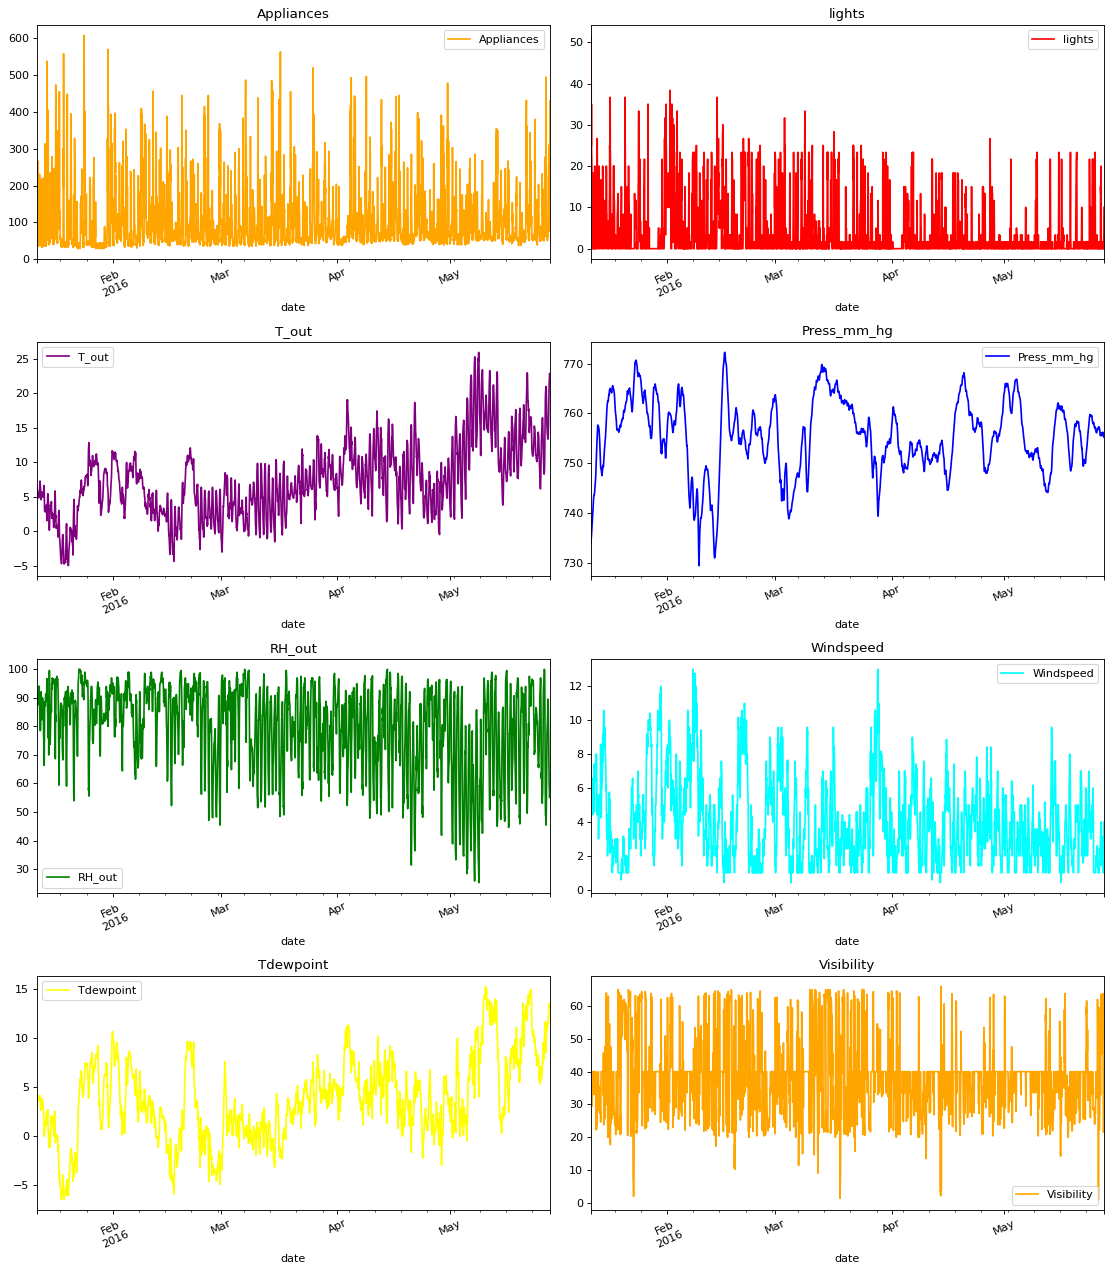

In [7]:
color_list = ['orange', 'red','purple','blue','green','cyan','yellow']

def visualize_data(data):
    features = list(df.select_dtypes(include=[np.number]).columns.values)
    features_size =len(features)
    fig, axes = plt.subplots(nrows=int(np.ceil(features_size//2)), ncols=2,figsize=(14,features_size*2), dpi =80,facecolor='w' ,edgecolor='k')
    
    
    for i in range(features_size):
        key = features[i]
        c = color_list[i%(len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(ax=axes[i//2,i%2], color =c,title="{}".format(key) ,rot=25)
        ax.legend([key])
        
        
    plt.tight_layout()
    
    
visualize_data(df)

ADFuller Test

In [9]:
for i in range(len(df.columns)):
    result = adfuller(df[df.columns[i]])
    
    if result[1] >0.05:
        print('{} series is not stationary'.format(df.columns[i]))
    else:
        print('{} series is  stationary'.format(df.columns[i]))

Appliances series is  stationary
lights series is  stationary
T_out series is  stationary
Press_mm_hg series is  stationary
RH_out series is  stationary
Windspeed series is  stationary
Tdewpoint series is  stationary
Visibility series is  stationary


Null hypothesis - Xt doesnot granger Yt 

In [14]:
max_lag =8
y = 'Appliances'


for i in range(len(df.columns)-1):
    results = grangercausalitytests(df[[y,df.columns[i+1]]],max_lag)
    #print(results[i+1])
    p_values =[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lag)]
    print('Column - {} : P-values -{}'.format(df.columns[i+1],p_values))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1239  , p=0.1451  , df_denom=3286, df_num=1
ssr based chi2 test:   chi2=2.1259  , p=0.1448  , df=1
likelihood ratio test: chi2=2.1252  , p=0.1449  , df=1
parameter F test:         F=2.1239  , p=0.1451  , df_denom=3286, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.6459  , p=0.0005  , df_denom=3283, df_num=2
ssr based chi2 test:   chi2=15.3151 , p=0.0005  , df=2
likelihood ratio test: chi2=15.2795 , p=0.0005  , df=2
parameter F test:         F=7.6459  , p=0.0005  , df_denom=3283, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.3262  , p=0.0001  , df_denom=3280, df_num=3
ssr based chi2 test:   chi2=22.0255 , p=0.0001  , df=3
likelihood ratio test: chi2=21.9520 , p=0.0001  , df=3
parameter F test:         F=7.3262  , p=0.0001  , df_denom=3280, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.4440  , p=0.

In [15]:
max_lag =8
y = 'Appliances'


for i in range(len(df.columns)-1):
    results = grangercausalitytests(df[[y,df.columns[i+1]]],max_lag)
    #print(results[i+1])
    p_values =[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lag)]
    print('Column - {} : P-values -{}'.format(df.columns[i+1],p_values))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1239  , p=0.1451  , df_denom=3286, df_num=1
ssr based chi2 test:   chi2=2.1259  , p=0.1448  , df=1
likelihood ratio test: chi2=2.1252  , p=0.1449  , df=1
parameter F test:         F=2.1239  , p=0.1451  , df_denom=3286, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.6459  , p=0.0005  , df_denom=3283, df_num=2
ssr based chi2 test:   chi2=15.3151 , p=0.0005  , df=2
likelihood ratio test: chi2=15.2795 , p=0.0005  , df=2
parameter F test:         F=7.6459  , p=0.0005  , df_denom=3283, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.3262  , p=0.0001  , df_denom=3280, df_num=3
ssr based chi2 test:   chi2=22.0255 , p=0.0001  , df=3
likelihood ratio test: chi2=21.9520 , p=0.0001  , df=3
parameter F test:         F=7.3262  , p=0.0001  , df_denom=3280, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.4440  , p=0.

In [18]:
"""
Column - lights : P-values -[0.1451, 0.0005, 0.0001, 0.0002, 0.0001, 0.0001, 0.0006, 0.0012]
Column - T_out : P-values -[0.002, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Press_mm_hg : P-values -[0.0985, 0.1956, 0.0351, 0.0016, 0.0, 0.0001, 0.0, 0.0]
Column - RH_out : P-values -[0.0, 0.0004, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Windspeed : P-values -[0.0004, 0.0041, 0.0094, 0.0082, 0.0163, 0.0119, 0.0009, 0.0002]
Column - Tdewpoint : P-values -[0.4348, 0.4494, 0.5005, 0.3887, 0.05, 0.0694, 0.0992, 0.1152]
Column - Visibility : P-values -[0.7071, 0.5372, 0.7338, 0.8265, 0.544, 0.3324, 0.2521, 0.3465]
"""

'\nColumn - lights : P-values -[0.1451, 0.0005, 0.0001, 0.0002, 0.0001, 0.0001, 0.0006, 0.0012]\nColumn - T_out : P-values -[0.002, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0]\nColumn - Press_mm_hg : P-values -[0.0985, 0.1956, 0.0351, 0.0016, 0.0, 0.0001, 0.0, 0.0]\nColumn - RH_out : P-values -[0.0, 0.0004, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0]\nColumn - Windspeed : P-values -[0.0004, 0.0041, 0.0094, 0.0082, 0.0163, 0.0119, 0.0009, 0.0002]\nColumn - Tdewpoint : P-values -[0.4348, 0.4494, 0.5005, 0.3887, 0.05, 0.0694, 0.0992, 0.1152]\nColumn - Visibility : P-values -[0.7071, 0.5372, 0.7338, 0.8265, 0.544, 0.3324, 0.2521, 0.3465]\n'

A low p-value (typically below a certain significance level, like 0.05) suggests that there is evidence to reject the null hypothesis, indicating that the variable being tested (e.g., 'lights', 'T_out', etc.) Granger-causes the 'Appliances' variable at the corresponding lag.

Conversely, a high p-value suggests that there is not enough evidence to reject the null hypothesis, indicating that the variable being tested does not Granger-cause the 'Appliances' variable at the corresponding lag.



Null hypothesis:

Xt doesnot grander Yt (doesn't relate more)

In [ ]:
# values less than 0.05 means they are related to Yt.  

In [20]:
ndf = df[['Appliances','T_out','Windspeed']]

In [22]:
train = ndf[0:int(0.9*len(ndf))]
test = ndf[int(0.9*len(ndf)):]

In [23]:
train

,Appliances,T_out,Windspeed
date,,,
2016-01-11 17:00:00,55.000000,6.308333,6.166667
2016-01-11 18:00:00,176.666667,5.941667,5.416667
2016-01-11 19:00:00,173.333333,6.000000,6.000000
2016-01-11 20:00:00,125.000000,6.000000,6.000000
2016-01-11 21:00:00,103.333333,5.833333,6.000000
...,...,...,...
2016-05-13 21:00:00,63.333333,14.116667,6.583333
2016-05-13 22:00:00,55.000000,11.850000,6.833333
2016-05-13 23:00:00,61.666667,10.466667,7.583333


In [24]:
test

,Appliances,T_out,Windspeed
date,,,
2016-05-14 02:00:00,60.000000,8.891667,3.166667
2016-05-14 03:00:00,60.000000,8.725000,2.833333
2016-05-14 04:00:00,60.000000,8.775000,4.416667
2016-05-14 05:00:00,56.666667,8.683333,5.000000
2016-05-14 06:00:00,63.333333,8.716667,5.000000
...,...,...,...
2016-05-27 14:00:00,101.666667,21.916667,2.000000
2016-05-27 15:00:00,76.666667,22.216667,2.000000
2016-05-27 16:00:00,135.000000,22.883333,2.416667


In [25]:
model = VAR(train, freq='h')

for i in range(48):
    results = model.fit(i+1)
    print('Order ', i+1)
    print('AIC ' , results.aic)
    print('BIC ', results.bic)

Order  1
AIC  7.12678509802429
BIC  7.151080819162066
Order  2
AIC  6.13876916892782
BIC  6.181298651759994
Order  3
AIC  6.019982255185911
BIC  6.080755770837745
Order  4
AIC  5.9605267907597215
BIC  6.039554619733089
Order  5
AIC  5.908069667837072
BIC  6.00536210002221
Order  6
AIC  5.891197292905782
BIC  6.006764627593054
Order  7
AIC  5.85225035501184
BIC  5.986102900903522
Order  8
AIC  5.841915871050664
BIC  5.994063946272741
Order  9
AIC  5.827889041110309
BIC  5.998342973224303
Order  10
AIC  5.825120732509794
BIC  6.013890858524601
Order  11
AIC  5.791083147024334
BIC  5.998179813408081
Order  12
AIC  5.78322849534456
BIC  6.008662058036488
Order  13
AIC  5.764122425516563
BIC  6.007903249938919
Order  14
AIC  5.7545168062341
BIC  6.016655267304056
Order  15
AIC  5.745057263179904
BIC  6.025563745321491
Order  16
AIC  5.734159567395153
BIC  6.033044464551212
Order  17
AIC  5.734437324119504
BIC  6.051711039763664
Order  18
AIC  5.727535892320577
BIC  6.063208839469243
Order  

In [26]:
model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,13.82,13.83,1.005e+06,13.82
1,7.139,7.163,1260.,7.148
2,6.149,6.192,468.3,6.165
3,6.031,6.093,416.2,6.053
4,5.970,6.050,391.7,5.999
5,5.917,6.015,371.3,5.952
6,5.902,6.019,365.7,5.944
7,5.863,5.999*,351.9,5.912
8,5.852,6.006,348.1,5.908
9,5.837,6.010,342.9,5.900


In [27]:
model = VAR(train, freq='h')
results = model.fit(7)

In [28]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 20, May, 2024
Time:                     17:36:27
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    5.98610
Nobs:                     2954.00    HQIC:                   5.90043
Log likelihood:          -21152.4    FPE:                    348.017
AIC:                      5.85225    Det(Omega_mle):         340.356
--------------------------------------------------------------------
Results for equation Appliances
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                37.865935         3.448219           10.981           0.000
L1.Appliances         0.451436         0.018470           24.442           0.000
L1.T_out              2.328238         2.534185        

In [30]:
lag = results.k_ar
lag

7

In [31]:
results.forecast(train.values[-lag:],steps=5)

array([[44.34598018,  8.92651619,  3.99333186],
       [33.70923187,  8.81719814,  4.13871016],
       [38.32344216,  9.01953267,  4.188856  ],
       [53.39756915,  9.3356185 ,  4.31429082],
       [60.93798924,  9.56974211,  4.40093836]])

In [32]:
test[0:5]

,Appliances,T_out,Windspeed
date,,,
2016-05-14 02:00:00,60.000000,8.891667,3.166667
2016-05-14 03:00:00,60.000000,8.725000,2.833333
2016-05-14 04:00:00,60.000000,8.775000,4.416667
2016-05-14 05:00:00,56.666667,8.683333,5.000000
2016-05-14 06:00:00,63.333333,8.716667,5.000000


Considering taking appliances only for further

In [36]:
app_df = pd.DataFrame([(results.params['Appliances']), results.pvalues['Appliances']]).T

In [37]:
app_df

,Appliances,Appliances
const,37.865935,4.701032e-28
L1.Appliances,0.451436,6.138160e-132
L1.T_out,2.328238,3.582355e-01
L1.Windspeed,2.268735,2.564126e-01
L2.Appliances,0.222279,4.255512e-28
L2.T_out,-4.372626,4.302427e-01
L2.Windspeed,-1.481847,6.603327e-01
L3.Appliances,-0.019489,3.454670e-01
L3.T_out,5.606923,3.952787e-01
L3.Windspeed,0.184615,9.598961e-01


In [38]:
app_df.columns = ['coeff' , 'pvalue']
app_df

,coeff,pvalue
const,37.865935,4.701032e-28
L1.Appliances,0.451436,6.138160e-132
L1.T_out,2.328238,3.582355e-01
L1.Windspeed,2.268735,2.564126e-01
L2.Appliances,0.222279,4.255512e-28
L2.T_out,-4.372626,4.302427e-01
L2.Windspeed,-1.481847,6.603327e-01
L3.Appliances,-0.019489,3.454670e-01
L3.T_out,5.606923,3.952787e-01
L3.Windspeed,0.184615,9.598961e-01


In [39]:
app_df['valid'] = np.where(app_df['pvalue'] <0.05 ,1,0)
app_df

,coeff,pvalue,valid
const,37.865935,4.701032e-28,1
L1.Appliances,0.451436,6.138160e-132,1
L1.T_out,2.328238,3.582355e-01,0
L1.Windspeed,2.268735,2.564126e-01,0
L2.Appliances,0.222279,4.255512e-28,1
L2.T_out,-4.372626,4.302427e-01,0
L2.Windspeed,-1.481847,6.603327e-01,0
L3.Appliances,-0.019489,3.454670e-01,0
L3.T_out,5.606923,3.952787e-01,0
L3.Windspeed,0.184615,9.598961e-01,0


In [40]:
coeff_arr = app_df['coeff'][1:].values 
coeff_arr

array([ 0.45143647,  2.32823846,  2.26873466,  0.2222793 , -4.37262576,
       -1.48184722, -0.01948858,  5.60692324,  0.18461514, -0.04369054,
       -5.43530357, -0.08685622,  0.00738616,  5.17191268, -1.99030973,
       -0.01683822,  3.22703425,  4.97164661, -0.01091878, -6.77733848,
       -2.97259279])

In [41]:
train[-lag:]

,Appliances,T_out,Windspeed
date,,,
2016-05-13 19:00:00,208.333333,19.333333,9.000000
2016-05-13 20:00:00,120.000000,17.066667,8.166667
2016-05-13 21:00:00,63.333333,14.116667,6.583333
2016-05-13 22:00:00,55.000000,11.850000,6.833333
2016-05-13 23:00:00,61.666667,10.466667,7.583333
2016-05-14 00:00:00,58.333333,9.791667,5.750000
2016-05-14 01:00:00,63.333333,9.333333,4.000000


In [43]:
in_arr = train[-lag:][::-1].stack().to_frame().T.values
in_arr

array([[ 63.33333333,   9.33333333,   4.        ,  58.33333333,
          9.79166667,   5.75      ,  61.66666667,  10.46666667,
          7.58333333,  55.        ,  11.85      ,   6.83333333,
         63.33333333,  14.11666667,   6.58333333, 120.        ,
         17.06666667,   8.16666667, 208.33333333,  19.33333333,
          9.        ]])

In [45]:
np.dot(in_arr,coeff_arr) + app_df['coeff'][:1].values

#result should match with results.forcast first ouput

array([44.34598018])